In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [6]:
# Update these paths based on your file location
fear_greed_path = '/content/drive/MyDrive/fear_greed_index.csv'
trader_data_path = '/content/drive/MyDrive/historical_data.csv'

# Load the datasets
feargreed_df = pd.read_csv(fear_greed_path)
trade_df = pd.read_csv(trader_data_path)

In [8]:
# Show a few rows
feargreed_df.head()
trade_df.head()

# Check columns
print(feargreed_df.columns)
print(trade_df.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [10]:
# Convert 'date' in fear_greed_df to datetime
feargreed_df['date'] = pd.to_datetime(feargreed_df['date'], format='%Y-%m-%d')

feargreed_df['date'] = feargreed_df['date'].dt.normalize()

# Convert 'Timestamp IST' in trader_df to datetime (auto format detection)
trade_df['Timestamp IST'] = pd.to_datetime(trade_df['Timestamp IST'], dayfirst=True)
trade_df['date'] = trade_df['Timestamp IST'].dt.normalize()

# Merge on 'date'
merged_df = pd.merge(trade_df, feargreed_df, on='date', how='inner')

# Show result
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed


In [12]:
merged_df.to_csv("/content/drive/MyDrive/merged_sentiment_trading_data.csv", index=False)


In [13]:
# Check the shape
print("Shape:", merged_df.shape)

# Preview a few rows
merged_df.head()

# Data types and missing values
merged_df.info()
merged_df.isnull().sum()


Shape: (211218, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211218 entries, 0 to 211217
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211218 non-null  object        
 1   Coin              211218 non-null  object        
 2   Execution Price   211218 non-null  float64       
 3   Size Tokens       211218 non-null  float64       
 4   Size USD          211218 non-null  float64       
 5   Side              211218 non-null  object        
 6   Timestamp IST     211218 non-null  datetime64[ns]
 7   Start Position    211218 non-null  float64       
 8   Direction         211218 non-null  object        
 9   Closed PnL        211218 non-null  float64       
 10  Transaction Hash  211218 non-null  object        
 11  Order ID          211218 non-null  int64         
 12  Crossed           211218 non-null  bool          
 13  Fee               211218 non-null  floa

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [14]:
# Drop columns not useful for analysis
columns_to_drop = ['Transaction Hash', 'Order ID', 'Crossed', 'Trade ID', 'Timestamp', 'timestamp', 'value']
merged_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [15]:
# Show missing values
merged_df.isnull().sum()

# Drop rows with missing critical values
merged_df = merged_df.dropna(subset=['Start Position', 'Direction', 'Closed PnL'])

# Optionally fill missing fee with 0 if it's not crucial
merged_df['Fee'] = merged_df['Fee'].fillna(0)

In [16]:
# Make all column names lowercase and replace spaces with underscores
merged_df.columns = merged_df.columns.str.lower().str.replace(' ', '_')


In [17]:
# Standardize column names (recommended)
merged_df.columns = merged_df.columns.str.lower().str.replace(' ', '_')

In [18]:
# Add profitability flag
merged_df['is_profitable'] = merged_df['closed_pnl'] > 0

In [19]:
# Count of each sentiment class
merged_df['classification'].value_counts()


,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


In [21]:
classification_counts = merged_df['classification'].value_counts().reset_index()
classification_counts.columns = ['classification', 'count']
classification_counts.to_csv("/content/drive/MyDrive/classification_counts.csv", index=False)


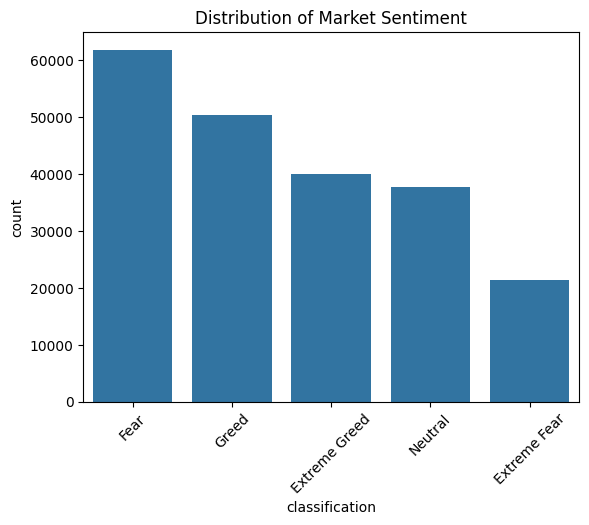

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=merged_df, x='classification', order=merged_df['classification'].value_counts().index)
plt.title("Distribution of Market Sentiment")
plt.xticks(rotation=45)
plt.show()

In [23]:
# Grouped statistics
merged_df.groupby('classification')[['closed_pnl', 'fee', 'start_position', 'execution_price']].mean()

,closed_pnl,fee,start_position,execution_price
classification,,,,
Extreme Fear,34.537862,1.116291,-2322.304587,7054.795108
Extreme Greed,67.892861,0.675902,19518.990812,6082.195865
Fear,54.290400,1.495172,8709.824822,14152.620222
Greed,42.743559,1.254372,-151088.546635,13411.276344
Neutral,34.307718,1.044798,144.002263,12393.692779


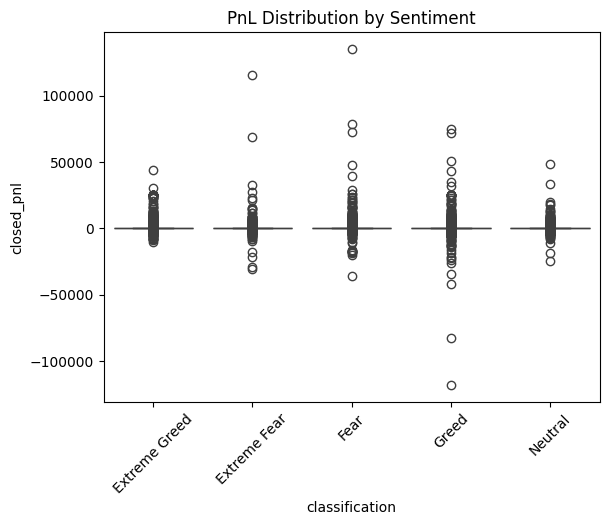

In [24]:
sns.boxplot(data=merged_df, x='classification', y='closed_pnl')
plt.title("PnL Distribution by Sentiment")
plt.xticks(rotation=45)
plt.show()


In [25]:
profit_rate = merged_df.groupby('classification')['is_profitable'].mean()
print(profit_rate)

classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: is_profitable, dtype: float64


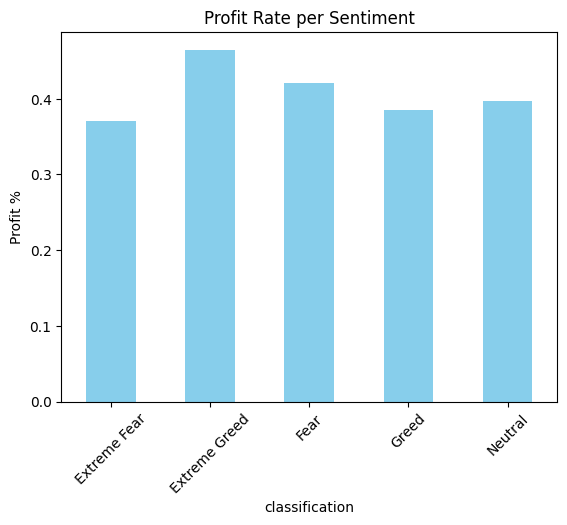

In [26]:
profit_rate.plot(kind='bar', title='Profit Rate per Sentiment', ylabel='Profit %', color='skyblue')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Check if leverage exists
if 'leverage' in merged_df.columns:
    sns.boxplot(data=merged_df, x='classification', y='leverage')
    plt.title("Leverage Usage by Sentiment")
    plt.xticks(rotation=45)
    plt.show()


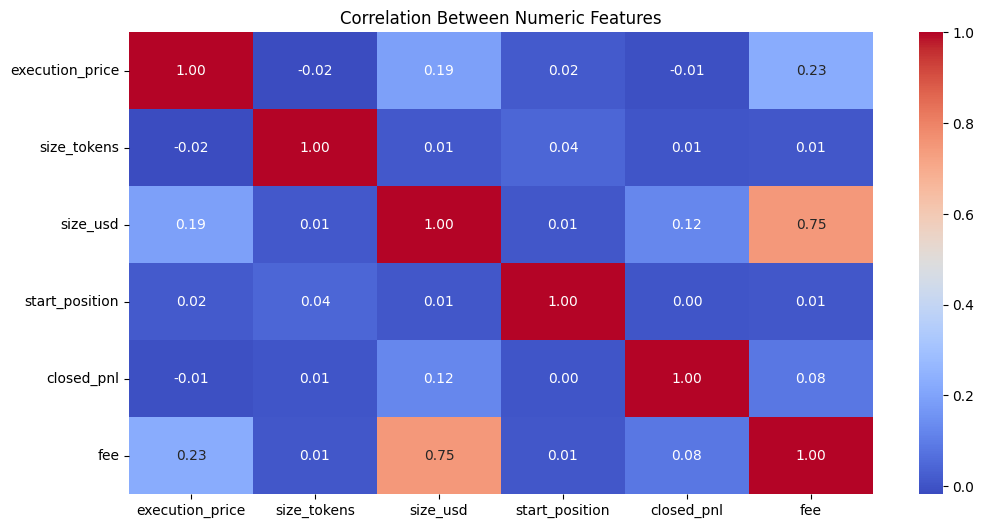

In [28]:
# Select only numeric columns
numeric_df = merged_df.select_dtypes(include='number')

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()


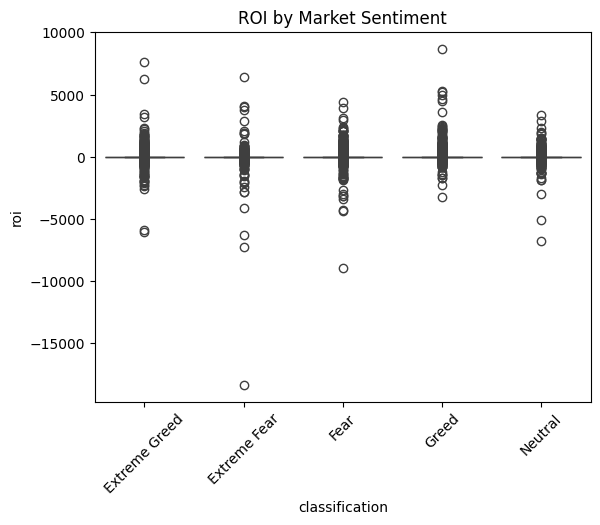

In [29]:
merged_df['roi'] = merged_df['closed_pnl'] / merged_df['start_position']
sns.boxplot(data=merged_df, x='classification', y='roi')
plt.title("ROI by Market Sentiment")
plt.xticks(rotation=45)
plt.show()


In [30]:
# Grouping by account and sentiment
trader_stats = merged_df.groupby(['account', 'classification']).agg(
    total_trades=('closed_pnl', 'count'),
    avg_pnl=('closed_pnl', 'mean'),
    win_rate=('is_profitable', 'mean'),
    avg_fee=('fee', 'mean'),
    avg_start_pos=('start_position', 'mean'),
    avg_exec_price=('execution_price', 'mean')
).reset_index()


In [31]:
# Filter traders who made at least 10 trades per sentiment type
trader_stats = trader_stats[trader_stats['total_trades'] >= 10]


In [32]:
pivot = trader_stats.pivot(index='account', columns='classification', values='avg_pnl')
pivot = pivot.fillna(0)
pivot.head()


classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
account,,,,,
0x083384f897ee0f19899168e3b1bec365f52a9012,1247.692214,-42.626810,626.194346,482.089321,298.456334
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,-24.912665,43.222903,-0.632623,10.211823,-16.573722
0x271b280974205ca63b716753467d5a371de622ab,20.962214,0.000000,16.125220,-185.221864,-31.783540
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,-44.714307,14.437904,9.594371,10.502556,6.207158
0x2c229d22b100a7beb69122eed721cee9b24011dd,101.921855,61.498681,10.444070,79.350486,41.667826


In [33]:
winrate_pivot = trader_stats.pivot(index='account', columns='classification', values='win_rate')


In [34]:
top_traders_ext_greed = trader_stats[trader_stats['classification'] == 'Extreme Greed']
top_traders_ext_greed = top_traders_ext_greed.sort_values(by='avg_pnl', ascending=False).head(10)
top_traders_ext_greed


,account,classification,total_trades,avg_pnl,win_rate,avg_fee,avg_start_pos,avg_exec_price
46,0x430f09841d65beb3f27765503d0f850b8bce7713,Extreme Greed,15,8285.663252,1.000000,2.899991,12864.996000,3.194753
135,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Extreme Greed,1643,672.735763,0.510043,0.928607,-30283.115124,1958.820975
71,0x6d6a4b953f202f8df5bed40692e7fd865318264a,Extreme Greed,171,428.023843,0.894737,0.146656,7897.878630,22.996585
26,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,Extreme Greed,161,192.498023,0.459627,0.150659,108811.354476,578.864864
121,0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0,Extreme Greed,256,181.294012,0.519531,0.096420,118825.383594,33.664382
36,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,Extreme Greed,206,178.981335,0.368932,0.496303,9049.679870,22.464519
31,0x39cef799f8b69da1995852eea189df24eb5cae3c,Extreme Greed,115,125.272912,0.495652,0.750400,806.364586,8838.783819
56,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,Extreme Greed,167,122.730863,0.359281,1.228196,14308.897006,10.648525
126,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,Extreme Greed,190,110.134280,0.552632,1.059801,2723.727529,113.473944
152,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,Extreme Greed,6723,71.219912,0.596311,0.249020,24978.911143,70.498264


In [35]:
contrarians = trader_stats[
    (trader_stats['classification'] == 'Extreme Fear') &
    (trader_stats['avg_pnl'] > 50) &  # arbitrary positive PnL threshold
    (trader_stats['win_rate'] > 0.5)
].sort_values(by='avg_pnl', ascending=False)
contrarians


,account,classification,total_trades,avg_pnl,win_rate,avg_fee,avg_start_pos,avg_exec_price
20,0x2c229d22b100a7beb69122eed721cee9b24011dd,Extreme Fear,112,101.921855,0.687500,0.816823,2.566402e+04,3.334737
85,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Extreme Fear,316,81.243158,0.914557,0.665176,-1.067847e+06,1.244441
75,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,Extreme Fear,509,66.758350,0.612967,1.306595,-1.552223e+01,1016.251684


In [36]:
merged_df['roi'] = merged_df['closed_pnl'] / merged_df['start_position']


In [37]:
# Normalize win rate and avg PnL to 0-1 scale
from sklearn.preprocessing import MinMaxScaler

rank_df = trader_stats.copy()
scaler = MinMaxScaler()
rank_df[['avg_pnl_norm', 'win_rate_norm']] = scaler.fit_transform(rank_df[['avg_pnl', 'win_rate']])

# Weighted score: 70% win rate, 30% avg PnL
rank_df['score'] = 0.7 * rank_df['win_rate_norm'] + 0.3 * rank_df['avg_pnl_norm']

# Get top traders
top_ranked = rank_df.sort_values(by='score', ascending=False).head(10)
top_ranked[['account', 'classification', 'avg_pnl', 'win_rate', 'score']]


,account,classification,avg_pnl,win_rate,score
46,0x430f09841d65beb3f27765503d0f850b8bce7713,Extreme Greed,8285.663252,1.000000,1.000000
35,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,Extreme Fear,5.818598,1.000000,0.713357
123,0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0,Greed,408.979729,0.953704,0.694907
85,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Extreme Fear,81.243158,0.914557,0.656158
71,0x6d6a4b953f202f8df5bed40692e7fd865318264a,Extreme Greed,428.023843,0.894737,0.654289
86,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Extreme Greed,55.005705,0.854607,0.613285
88,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Greed,36.645300,0.807869,0.579932
87,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Fear,29.666031,0.779447,0.559795
59,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,Neutral,144.910850,0.752976,0.545255
28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,Greed,-34.627353,0.725490,0.519800


In [38]:
pnl_by_sentiment = merged_df.groupby('classification')[['closed_pnl', 'fee', 'start_position', 'execution_price']].mean().reset_index()
pnl_by_sentiment.to_csv("/content/drive/MyDrive/pnl_by_sentiment.csv", index=False)


In [39]:
correlation_matrix = numeric_df.corr()
correlation_matrix.to_csv("/content/drive/MyDrive/heatmap_data.csv")


In [40]:
top_traders_ext_greed.to_csv("/content/drive/MyDrive/top_traders.csv", index=False)


In [41]:
top_ranked[['account', 'classification', 'avg_pnl', 'win_rate', 'score']].to_csv("/content/drive/MyDrive/trader_scores.csv", index=False)


DASHBOARD

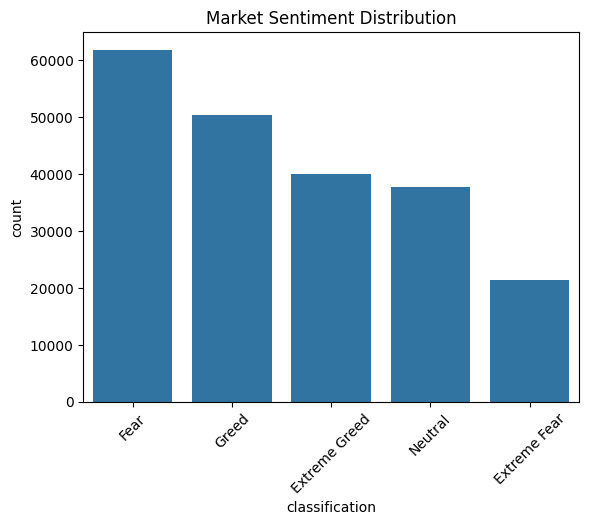

<Figure size 640x480 with 0 Axes>

In [48]:
sns.countplot(data=merged_df, x='classification', order=merged_df['classification'].value_counts().index)
plt.title("Market Sentiment Distribution")
plt.xticks(rotation=45)
plt.show()
plt.savefig("/content/drive/MyDrive/sentiment_distribution.png")


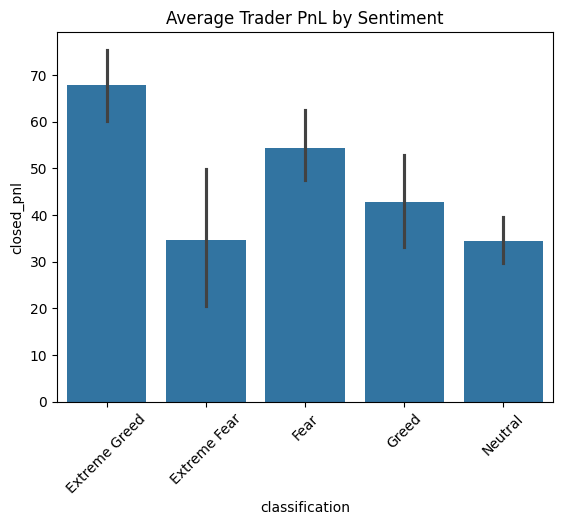

<Figure size 640x480 with 0 Axes>

In [49]:
sns.barplot(data=merged_df, x='classification', y='closed_pnl', estimator='mean')
plt.title("Average Trader PnL by Sentiment")
plt.xticks(rotation=45)
plt.show()
plt.savefig("/content/drive/MyDrive/avg_pnl_by_sentiment.png")


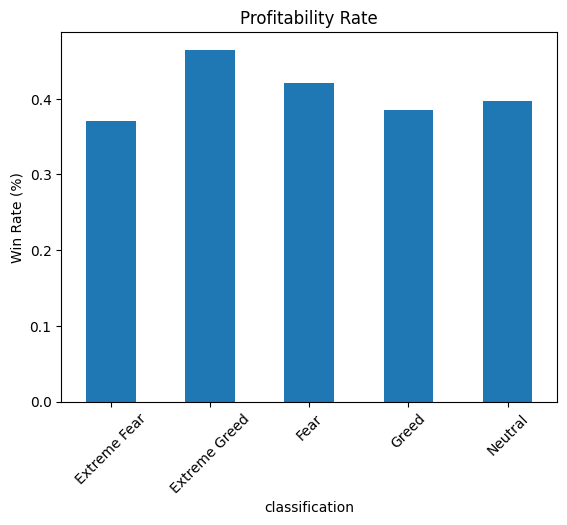

<Figure size 640x480 with 0 Axes>

In [50]:
merged_df.groupby('classification')['is_profitable'].mean().plot(kind='bar', title='Profitability Rate')
plt.ylabel("Win Rate (%)")
plt.xticks(rotation=45)
plt.show()
plt.savefig("/content/drive/MyDrive/winrate_by_sentiment.png")


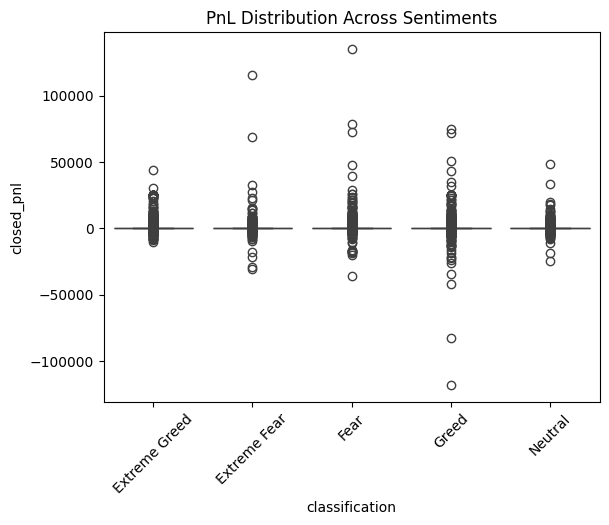

<Figure size 640x480 with 0 Axes>

In [51]:
sns.boxplot(data=merged_df, x='classification', y='closed_pnl')
plt.title("PnL Distribution Across Sentiments")
plt.xticks(rotation=45)
plt.show()
plt.savefig("/content/drive/MyDrive/pnl_boxplot.png")


In [46]:
top_ranked[['account', 'classification', 'avg_pnl', 'win_rate', 'score']].head(10)


,account,classification,avg_pnl,win_rate,score
46,0x430f09841d65beb3f27765503d0f850b8bce7713,Extreme Greed,8285.663252,1.000000,1.000000
35,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,Extreme Fear,5.818598,1.000000,0.713357
123,0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0,Greed,408.979729,0.953704,0.694907
85,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Extreme Fear,81.243158,0.914557,0.656158
71,0x6d6a4b953f202f8df5bed40692e7fd865318264a,Extreme Greed,428.023843,0.894737,0.654289
86,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Extreme Greed,55.005705,0.854607,0.613285
88,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Greed,36.645300,0.807869,0.579932
87,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Fear,29.666031,0.779447,0.559795
59,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,Neutral,144.910850,0.752976,0.545255
28,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,Greed,-34.627353,0.725490,0.519800
